In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import matplotlib.pyplot as mpimg
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [20]:
image = mpimg.imread('../images/다운로드.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
print(image.shape) # (height, width, channels)
plt.imshow(image)   

(157, 321, 3)


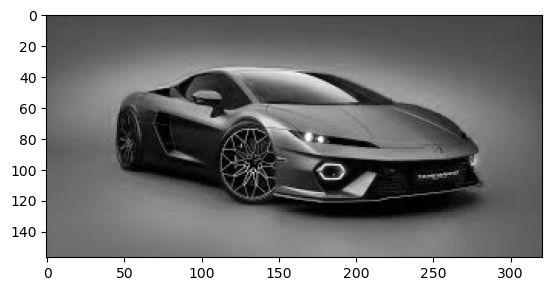

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [22]:
x, y = 100, 100
print('pixel value at (100, 100):', image[x, y])
#픽셀 값의 범위
print('pixel value range:', gray.min(), gray.max())

#픽셀 값의 형균과 표준편차
print('pixel value mean:', gray.mean())
print('pixel value std:', gray.std())

pixel value at (100, 100): [51 14  6]
pixel value range: 0 253
pixel value mean: 95.27553227374645
pixel value std: 43.83348951702586


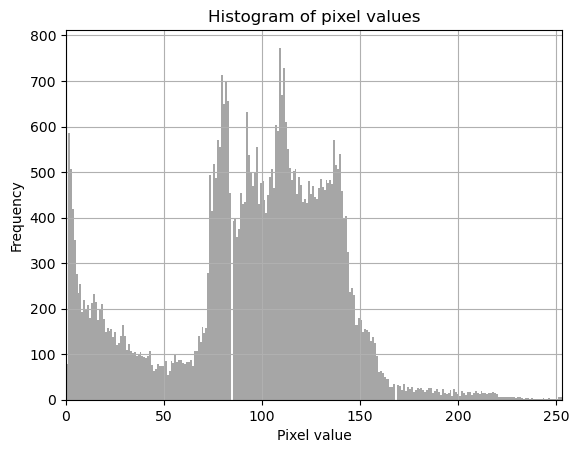

In [24]:
#픽셀 겂의 히스토그램을 그립니다
plt.hist(gray.ravel(), bins=256, range=(gray.min(), gray.max()),
color='gray', alpha=0.7)

plt.title('Histogram of pixel values')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.xlim(gray.min(), gray.max())
plt.grid()
plt.show()

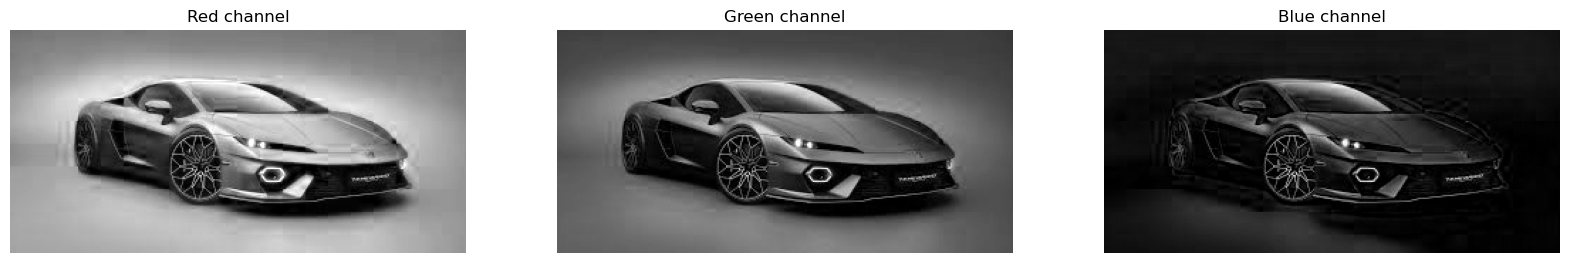

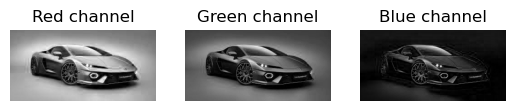

In [27]:
#RGB 채널을 분리합니다
#r, g, b = cv2.split(image) 간단한 방법
r = image[:, :, 0]
g = image[:, :, 1]  
b = image[:, :, 2]

#각 채널의 시각을 그립니다
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(r, cmap='gray')
ax1.set_title('Red channel')
ax1.axis('off')
ax2.imshow(g, cmap='gray')
ax2.set_title('Green channel')
ax2.axis('off')
ax3.imshow(b, cmap='gray')
ax3.set_title('Blue channel')
ax3.axis('off')
plt.show()

plt.subplot(1, 3, 1) #행,열,위치
plt.imshow(r, cmap='gray')
plt.title('Red channel')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Green channel')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('Blue channel')
plt.axis('off')
plt.show()

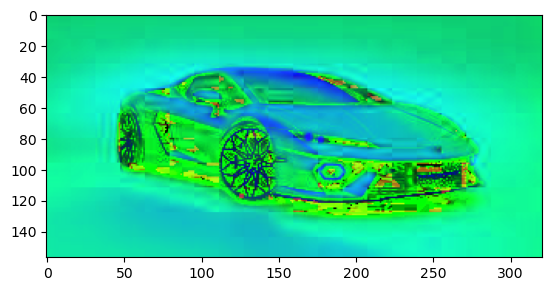

In [28]:
#HSWB 색상 공간으로 변환합니다
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

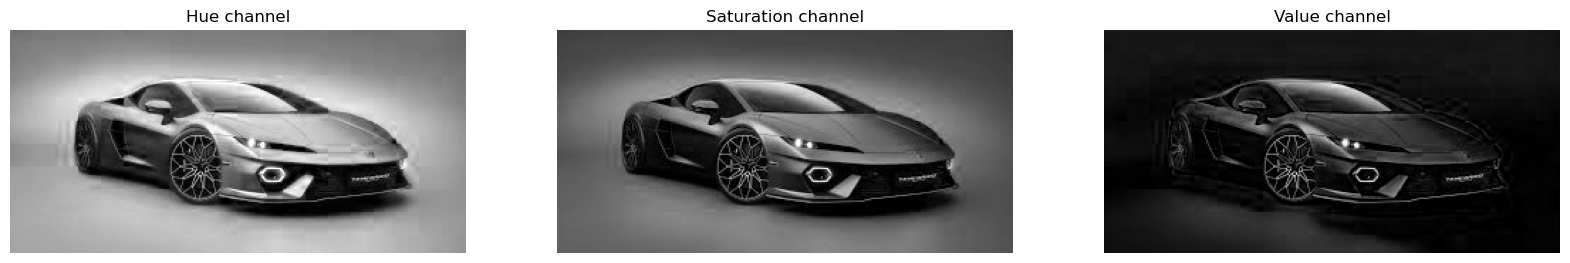

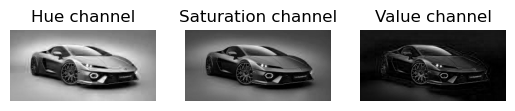

In [31]:
#HSV 채널을 분리합니다
#r, g, b = cv2.split(image) 간단한 방법
h = image[:, :, 0]
s = image[:, :, 1]  
v = image[:, :, 2]

#각 채널의 시각을 그립니다
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(r, cmap='gray')
ax1.set_title('Hue channel')
ax1.axis('off')
ax2.imshow(g, cmap='gray')
ax2.set_title('Saturation channel')
ax2.axis('off')
ax3.imshow(b, cmap='gray')
ax3.set_title('Value channel')
ax3.axis('off')
plt.show()

plt.subplot(1, 3, 1) #행,열,위치
plt.imshow(r, cmap='gray')
plt.title('Hue channel')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Saturation channel')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('Value channel')
plt.axis('off')
plt.show()

(168, 300, 3)


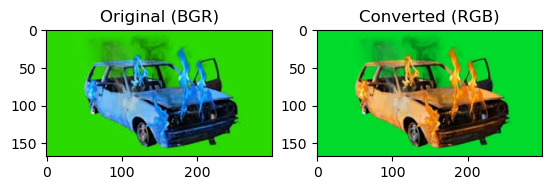

In [39]:
import cv2
import matplotlib.pyplot as plt

# Load image
green_screen = cv2.imread('../images/images.jpg')

# Check if the image was loaded
if green_screen is None:
    print("Image not loaded. Please check the path.")
else:
    # Convert BGR to RGB
    green_screen_rgb = cv2.cvtColor(green_screen, cv2.COLOR_BGR2RGB)
    print(green_screen_rgb.shape)  # (height, width, channels)

    # Display side-by-side
    plt.subplot(1, 2, 1)
    plt.imshow(green_screen)
    plt.title('Original (BGR)')

    plt.subplot(1, 2, 2)
    plt.imshow(green_screen_rgb)
    plt.title('Converted (RGB)')

    plt.show()


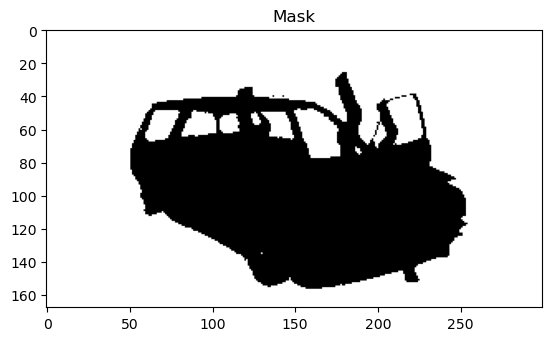

In [40]:
#임계값 생성
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

#마스크 생성
mask = cv2.inRange(green_screen_rgb, lower_green, upper_green)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

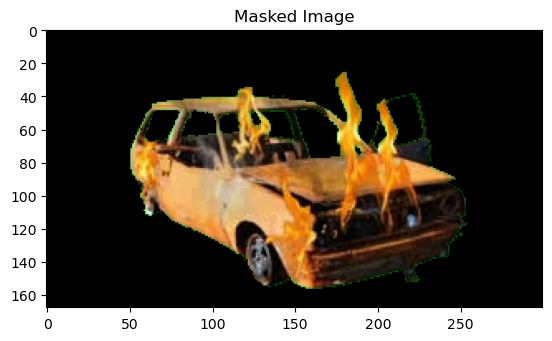

In [41]:
# 마스크 사용하고 배경 제거
masked_image = np.copy(green_screen_rgb)
masked_image[mask == 255] = [0, 0, 0]  # Set green pixels to black
plt.imshow(masked_image)
plt.title('Masked Image')
plt.show()

In [ ]:
# 마스크 이미지에서 새로운 배경을 추가합니다
#ckground = cv2.imread('../images/다운로드.jpg')
#ackground = cv2.resize(background, (masked_image.shape[1], masked_image.shape[0]))  # Resize to match the masked image

# use image as background
background_rgb = np.copy(image)

background_rgb = cv2.resize(background_rgb, (masked_image.shape[1], masked_image.shape[0]))  # Resize to match the masked image
masked_image[mask == 0] = background_rgb[mask == 0]  # Set non-green pixels to the background   
plt.imshow(masked_image)
plt.title('Final Image with Background')
plt.show()
